In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r, number_count_analysis, qso_catalogs_report
from utils_plotting import plot_class_histograms

In [3]:
sns.set(style='ticks')

# KIDS magnitudes

In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='u-g')

Data shape: (91317, 44)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing U-G < 0: 32998 left


In [5]:
catalog = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-colors-cstar_cut-u-g__2018-04-12_11:11:15.csv')
catalog.shape

(5311548, 18)

In [6]:
catalog['train'] = catalog['ID'].isin(kids_x_sdss['ID'])

In [7]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']
qso_catalog = catalog.loc[catalog['CLASS'] == 'QSO']

In [8]:
catalog_sampled = catalog.sample(n=500000, random_state=1567)
qso_catalog_sampled = qso_catalog.sample(n=100000, random_state=1567)

In [9]:
catalog_north = catalog.loc[catalog['DECJ2000'] > -15]
catalog_south = catalog.loc[catalog['DECJ2000'] < -15]

In [10]:
kids_x_sdss_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.5]
kids_x_sdss_non_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] <= 0.5]

catalog_star = catalog.loc[catalog['CLASS_STAR'] >= 0.5]
catalog_non_star = catalog.loc[catalog['CLASS_STAR'] <= 0.5]

In [11]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([17097,  5658, 10243]),
 array([51.81223104, 17.14649373, 31.04127523]))

In [12]:
describe_column(catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([2879592, 1297302, 1134654]),
 array([54.21379982, 24.42417917, 21.36202102]))

In [13]:
describe_column(catalog_north['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1783267,  802522,  812695]),
 array([52.47242594, 23.61411735, 23.91345671]))

In [14]:
describe_column(catalog_south['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1096325,  494780,  321959]),
 array([57.30728298, 25.86322256, 16.82949447]))

In [15]:
describe_column(catalog_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  18710,  386021, 1120616]),
 array([ 1.22660614, 25.30709406, 73.4662998 ]))

In [16]:
describe_column(catalog_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([2860882,  911281,   14038]),
 array([75.56075338, 24.0684792 ,  0.37076743]))

# Photo catalogs

In [17]:
qso_catalogs_report(catalog)

Catalog size: 5311548
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2879592, 1297302, 1134654]), array([54.21379982, 24.42417917, 21.36202102]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 11682, train elements: 2508
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 515, 9861, 1306]), array([ 4.4084917 , 84.41191577, 11.17959254]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 13590, train elements: 2949
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  426, 12157,  1007]), array([ 3.13465784, 89.45548197,  7.40986019]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 38843, train elements: 5474
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 3900, 27192,  7751]), array([10.04041912, 70.00489149, 19.95468939]))


# Standalone bands

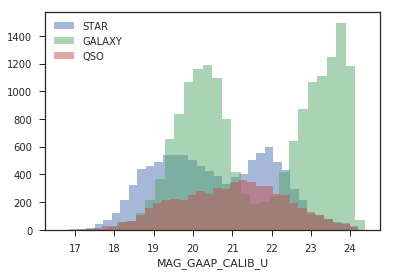

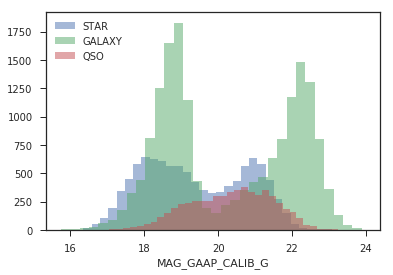

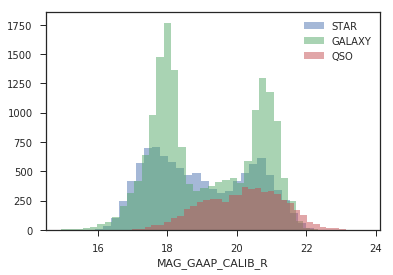

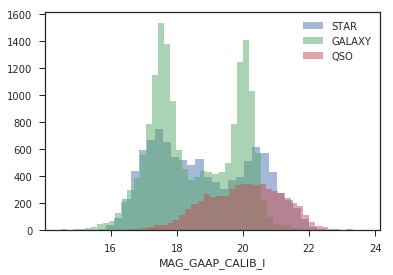

In [18]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

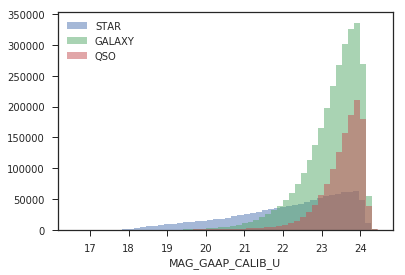

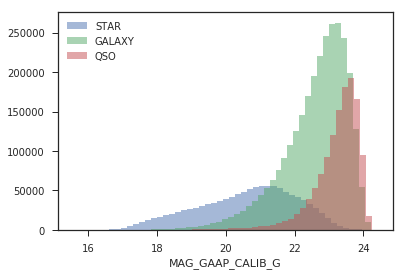

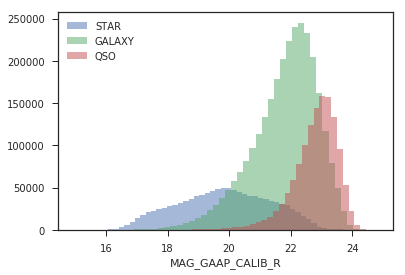

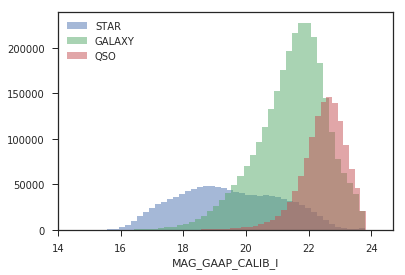

In [19]:
plot_class_histograms(catalog, BAND_CALIB_COLUMNS)

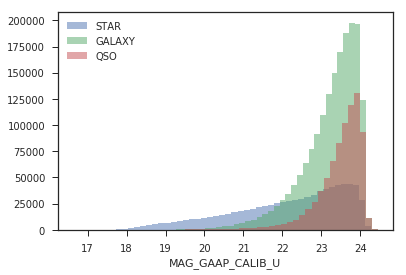

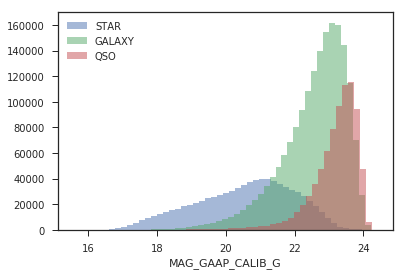

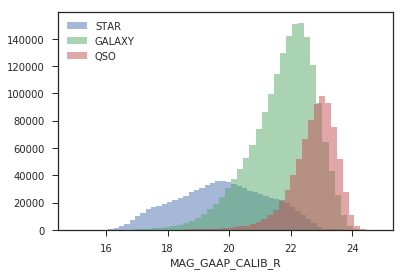

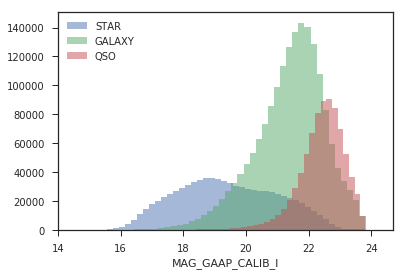

In [20]:
plot_class_histograms(catalog_north, BAND_CALIB_COLUMNS)

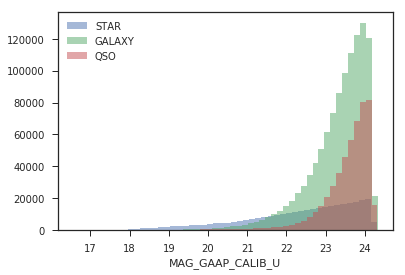

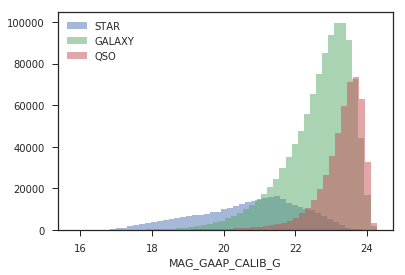

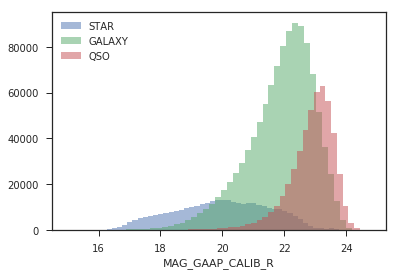

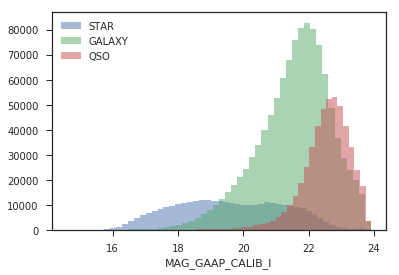

In [21]:
plot_class_histograms(catalog_south, BAND_CALIB_COLUMNS)

# Paired bands

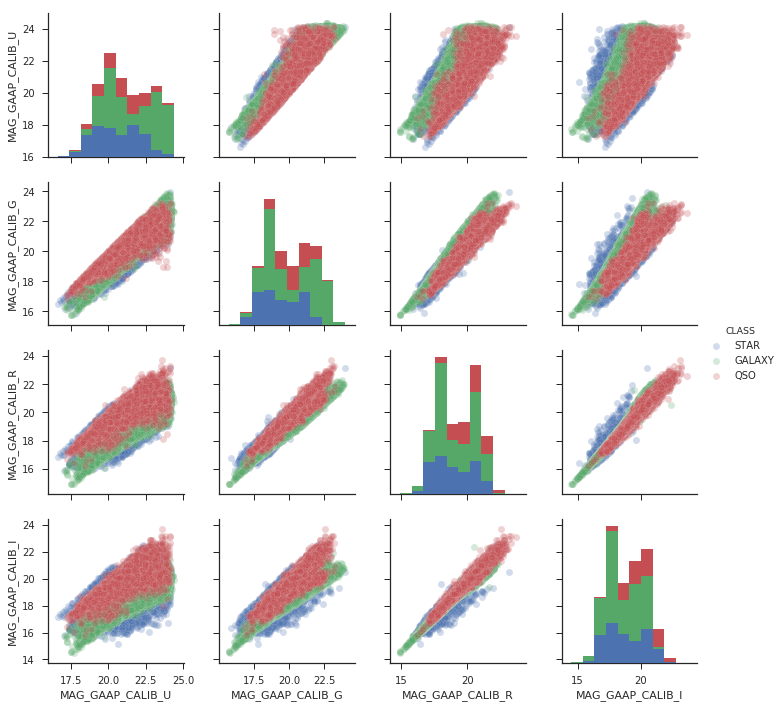

In [22]:
sns.pairplot(kids_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

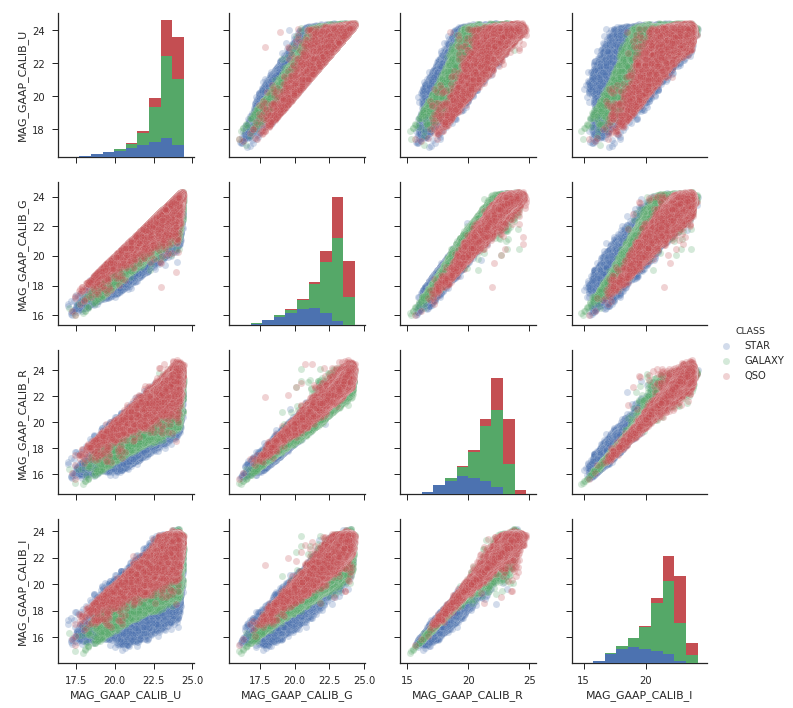

In [23]:
sns.pairplot(catalog_sampled[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

# Standalone colors

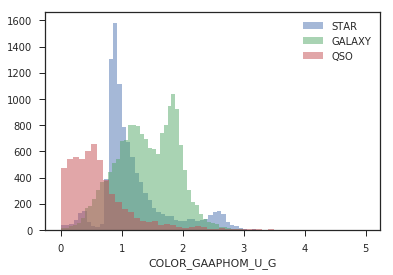

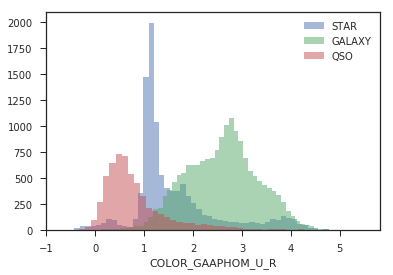

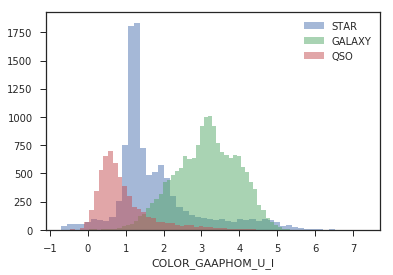

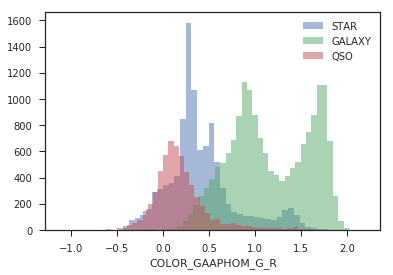

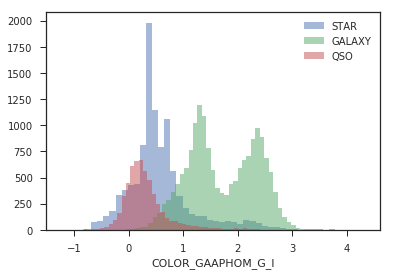

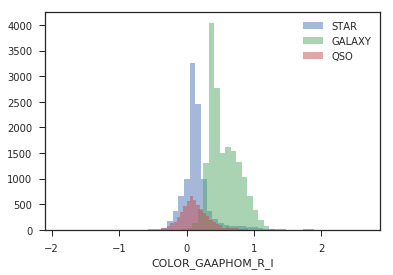

In [24]:
plot_class_histograms(kids_x_sdss, COLOR_COLUMNS)

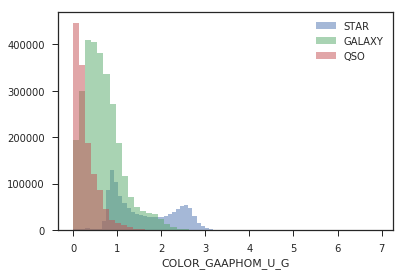

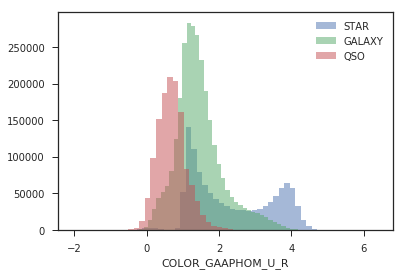

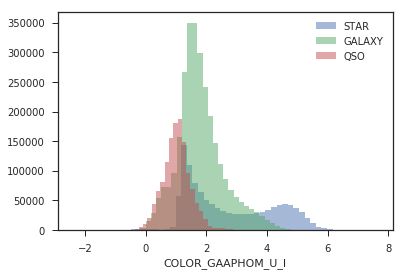

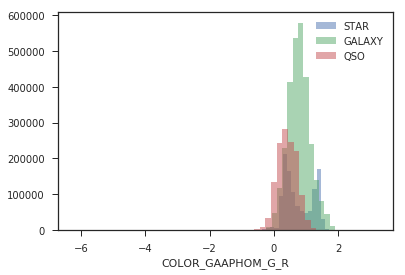

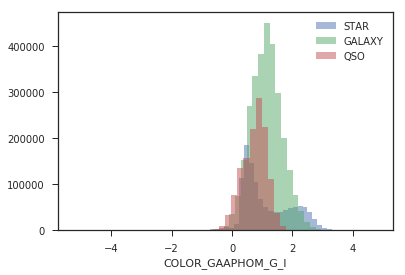

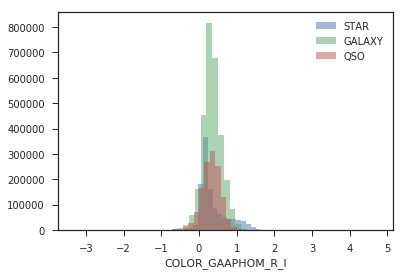

In [25]:
plot_class_histograms(catalog, COLOR_COLUMNS)

# Paired colors

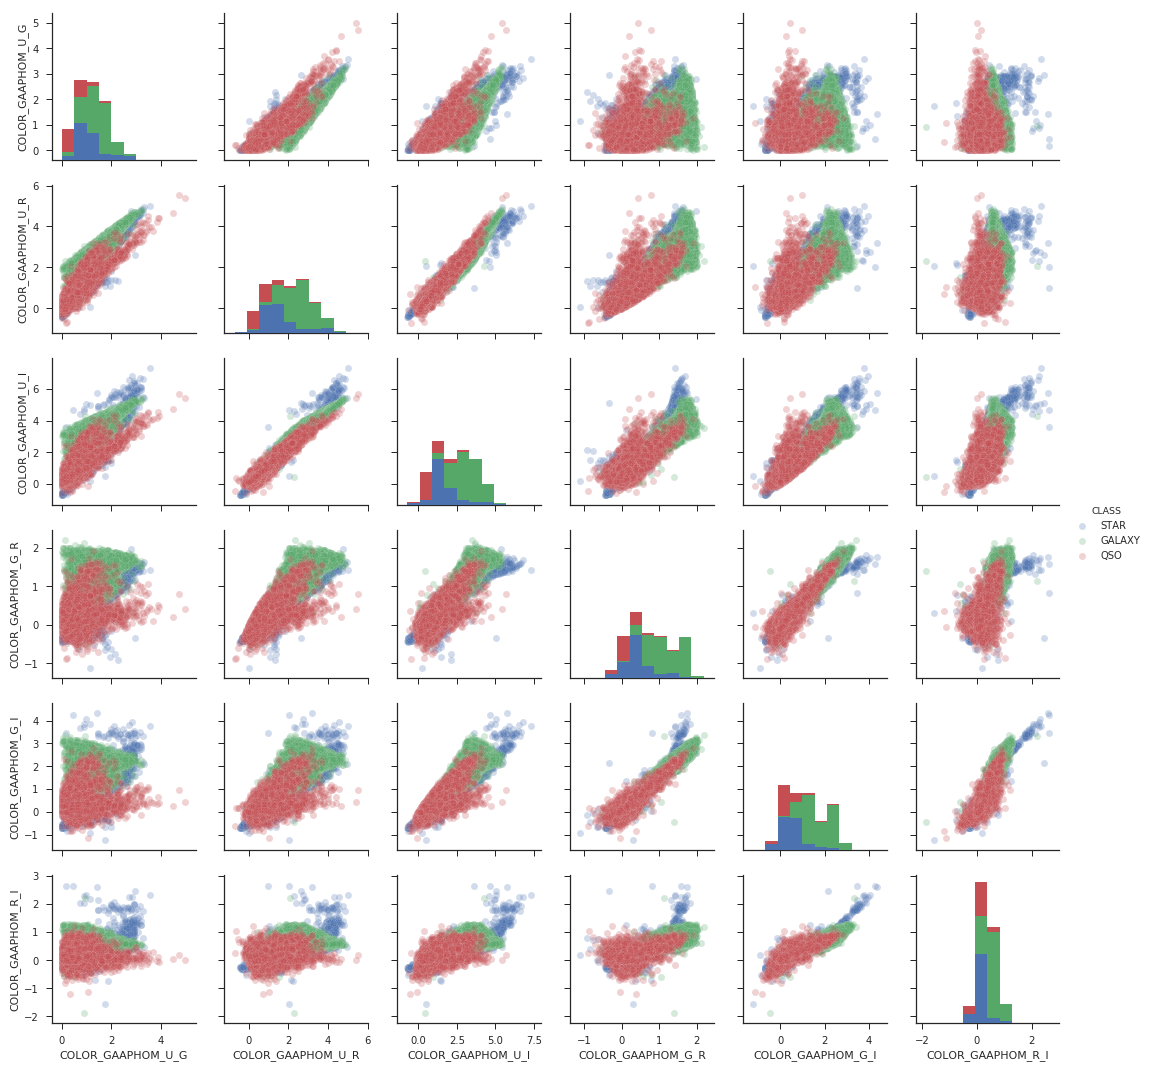

In [26]:
sns.pairplot(kids_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

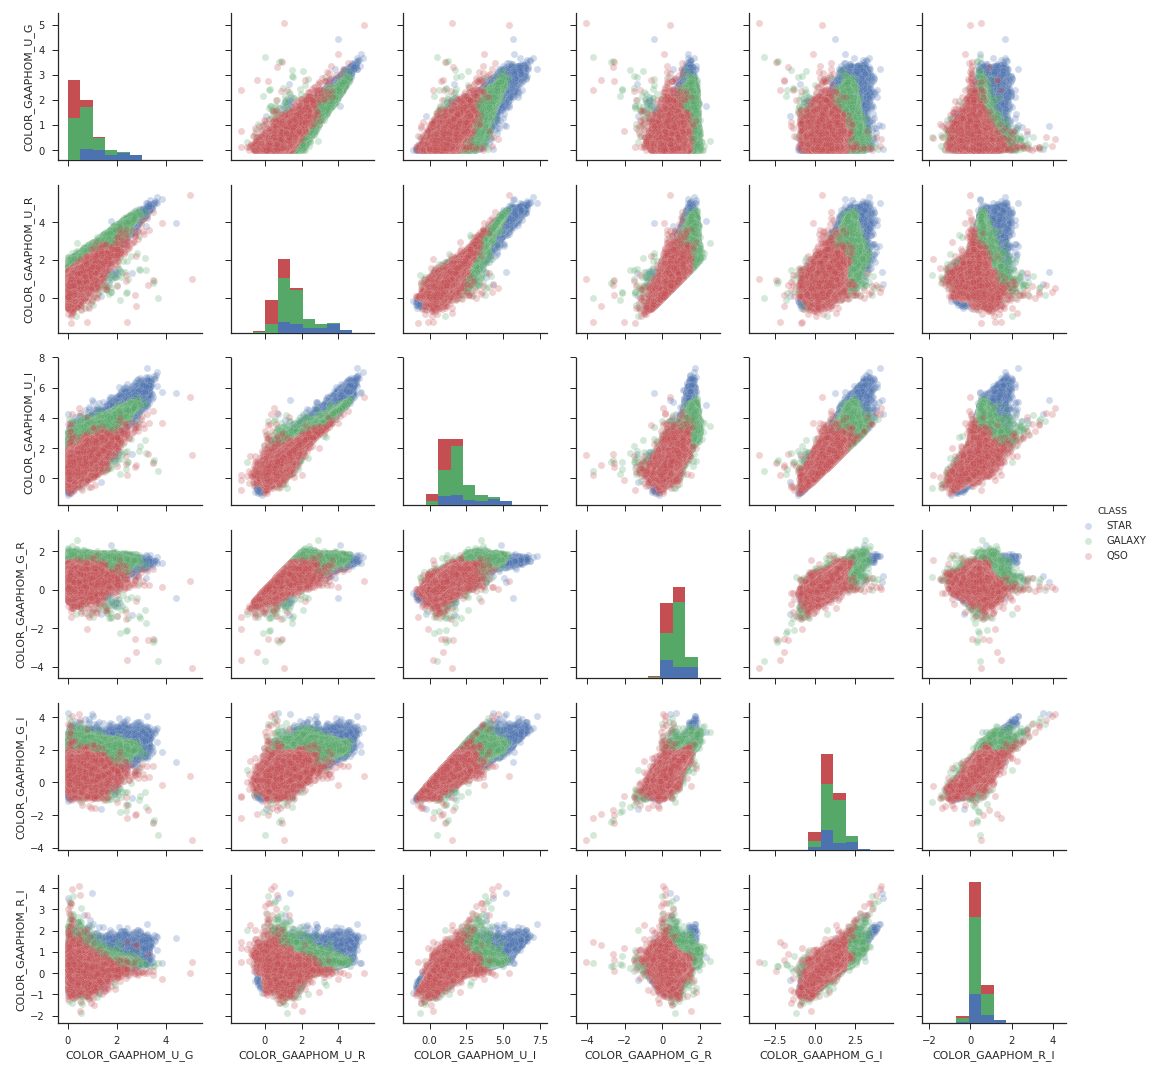

In [27]:
sns.pairplot(catalog_sampled[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

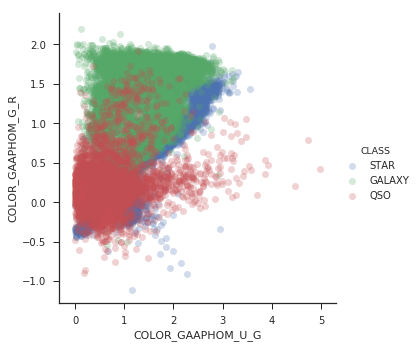

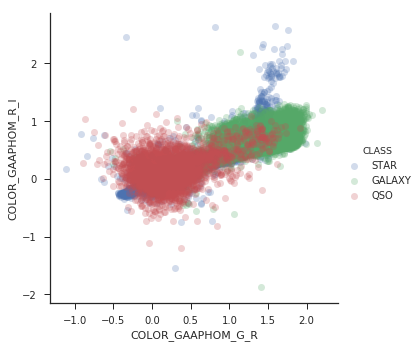

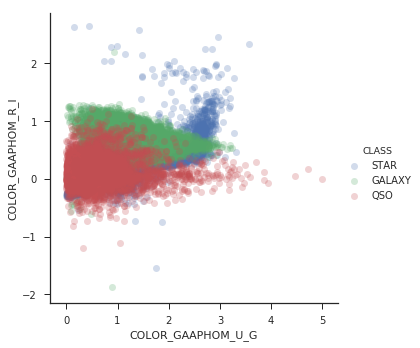

In [28]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

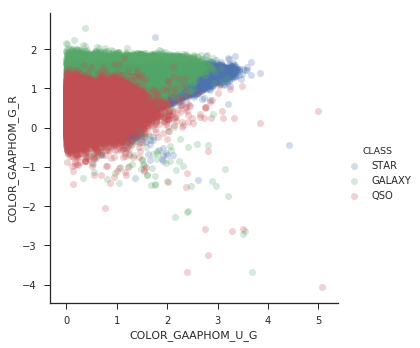

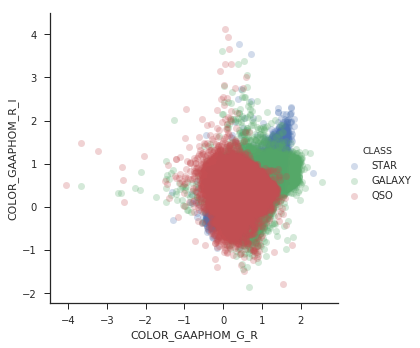

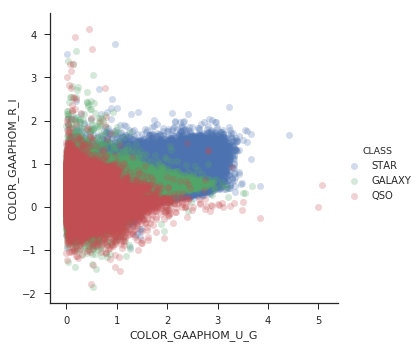

In [29]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_sampled, fit_reg=False, scatter_kws={'alpha': 0.25})

# QSO color pairs

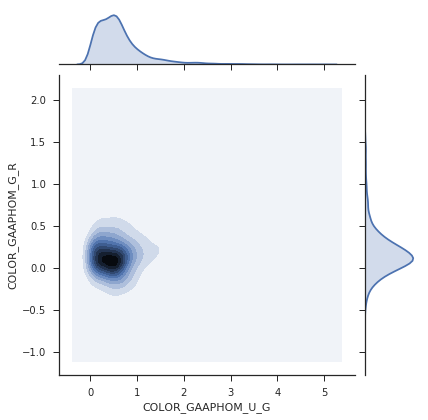

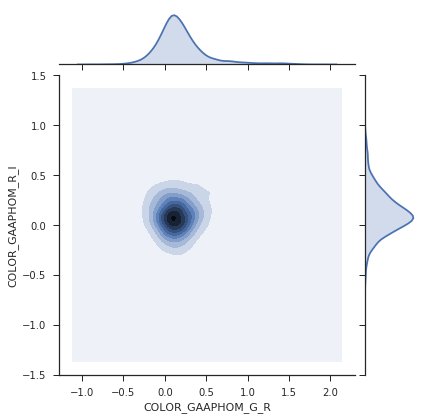

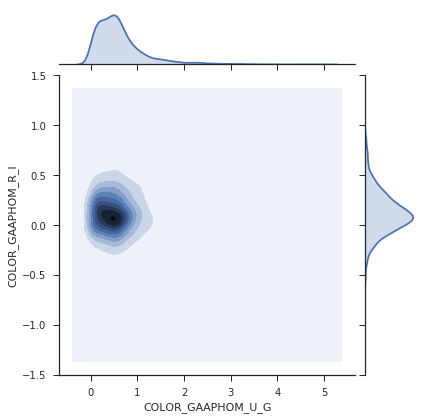

In [30]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_sdss[b_1], qso_kids_sdss[b_2], kind='kde', stat_func=None)

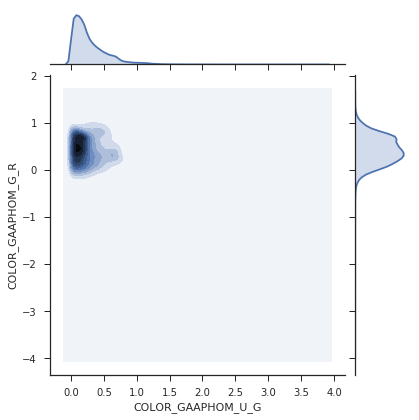

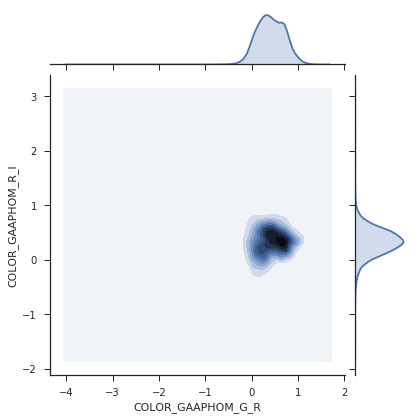

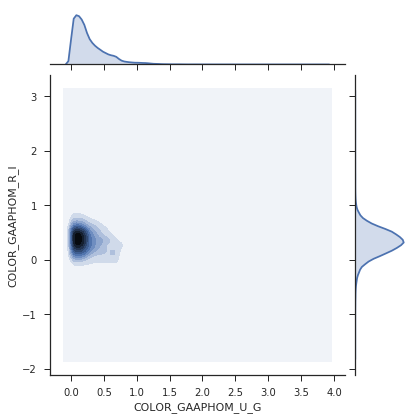

In [31]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_catalog_sampled[b_1], qso_catalog_sampled[b_2], kind='kde', stat_func=None)

# Number counts analysis

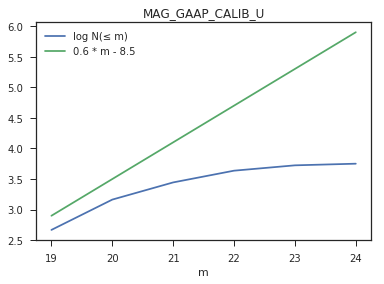

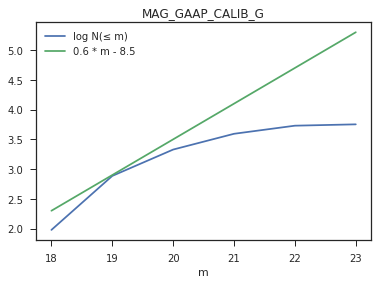

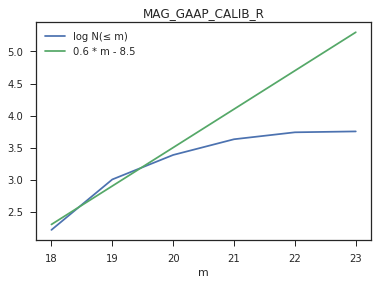

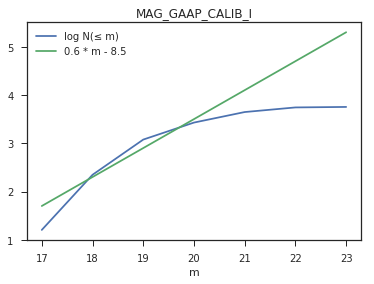

In [32]:
number_count_analysis(qso_kids_sdss, c=8.5)

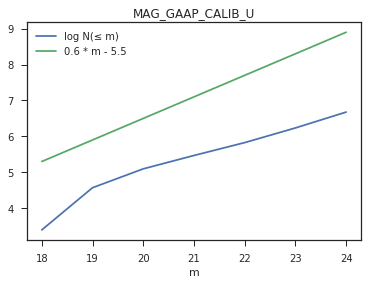

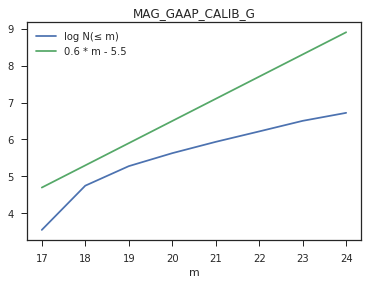

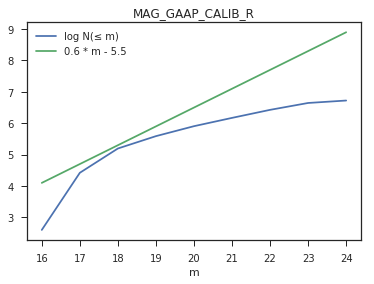

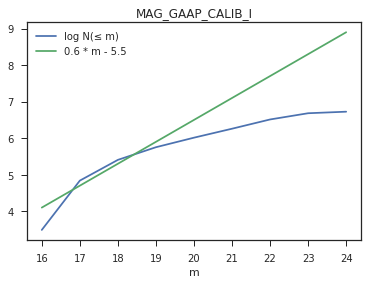

In [33]:
number_count_analysis(catalog, c=5.5)

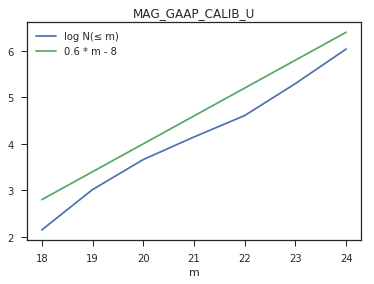

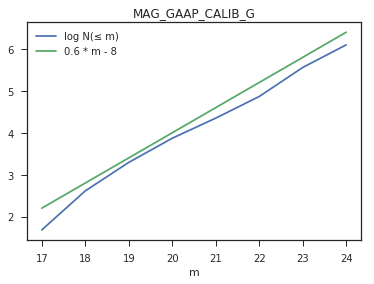

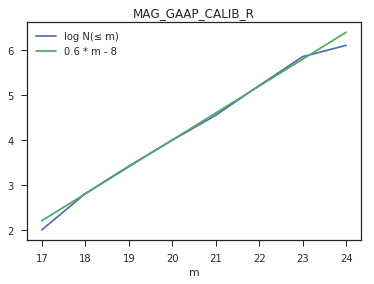

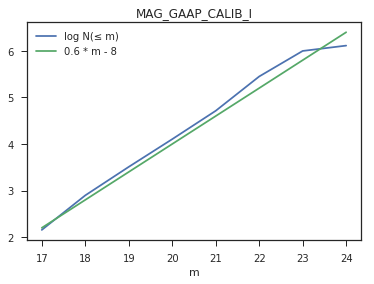

In [34]:
number_count_analysis(qso_catalog, c=8)

# Predictions

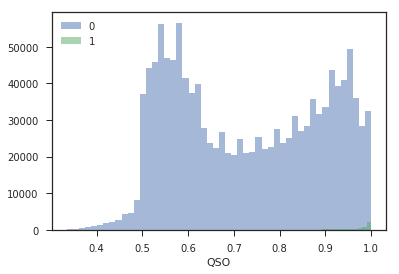

In [35]:
for t in [0, 1]:
    sns.distplot(qso_catalog.loc[qso_catalog['train'] == t]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

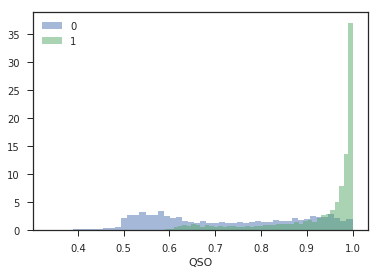

In [36]:
for t in [0, 1]:
    sns.distplot(qso_catalog.loc[qso_catalog['train'] == t]['QSO'], label=str(t), norm_hist=True, kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

# CLASS_STAR

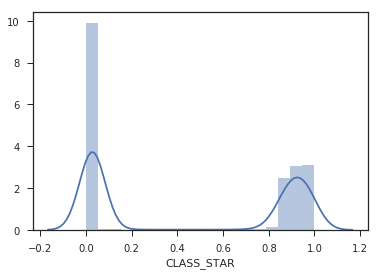

In [37]:
sns.distplot(kids_x_sdss['CLASS_STAR'])

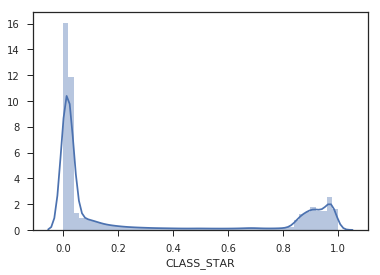

In [38]:
sns.distplot(catalog['CLASS_STAR'])

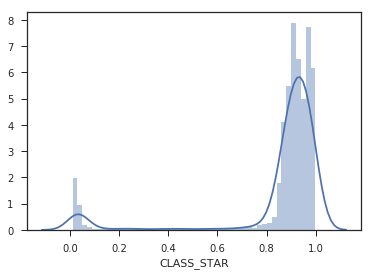

In [39]:
sns.distplot(qso_kids_sdss['CLASS_STAR'])

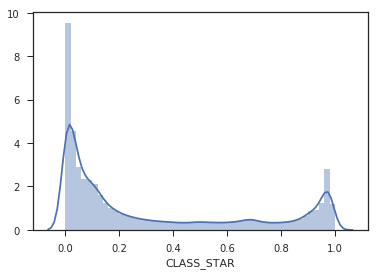

In [40]:
sns.distplot(qso_catalog['CLASS_STAR'])

## Color-color plots

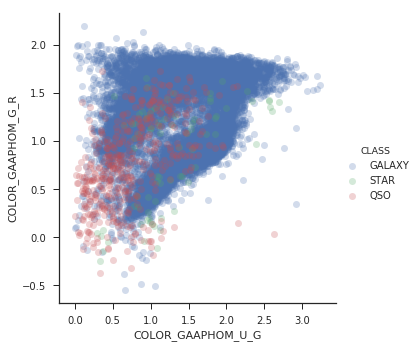

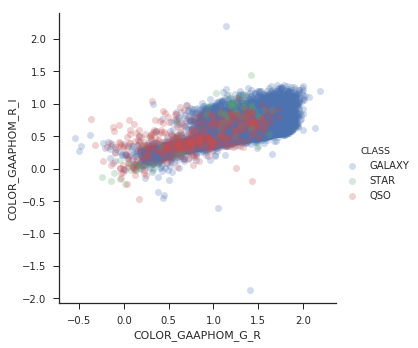

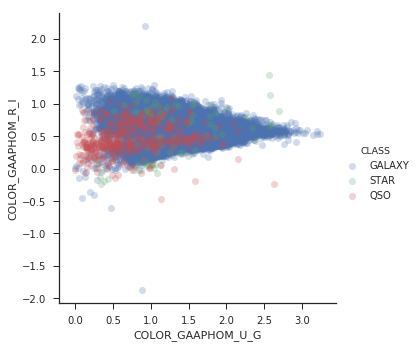

In [41]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

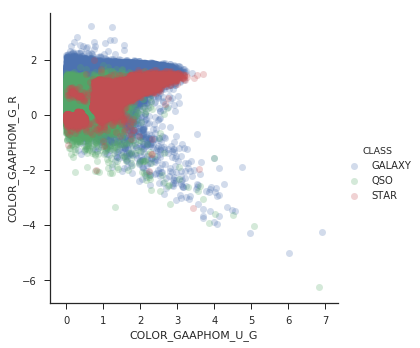

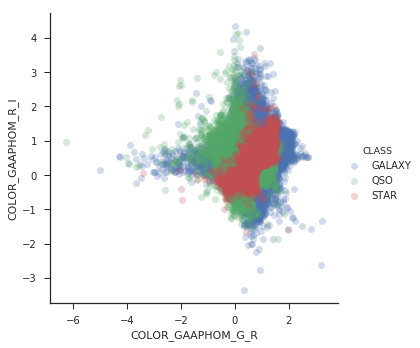

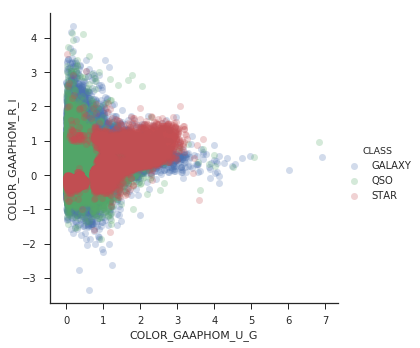

In [42]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

## Other QSO catalogs

In [43]:
qso_catalogs_report(catalog_star)

Catalog size: 1525347
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  18710,  386021, 1120616]), array([ 1.22660614, 25.30709406, 73.4662998 ]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 10662, train elements: 2461
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  51, 9314, 1297]), array([ 0.47833427, 87.35696867, 12.16469705]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 12684, train elements: 2896
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([   93, 11596,   995]), array([ 0.73320719, 91.42226427,  7.84452854]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 32322, train elements: 5339
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  393, 24320,  7609]), array([ 1.21589011, 75.24286863, 23.54124126]))


In [44]:
qso_catalogs_report(catalog_non_star)

Catalog size: 3786201
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2860882,  911281,   14038]), array([75.56075338, 24.0684792 ,  0.37076743]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 1020, train elements: 47
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([464, 547,   9]), array([45.49019608, 53.62745098,  0.88235294]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 906, train elements: 53
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([333, 561,  12]), array([36.75496689, 61.9205298 ,  1.32450331]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 6521, train elements: 135
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3507, 2872,  142]), array([53.78009508, 44.0423248 ,  2.17758013]))
